In [1]:
import numpy as np
from ripser import ripser
from matplotlib import pyplot as plt
from topo import viz 
from os.path import join
viz.set_plotting_style_plt()
%config InlineBackend.figure_format="retina"


In [10]:
fig_dir = "/home/mnu/projects/topo/figs/paper_figs/box2/"

In [12]:
!mkdir {fig_dir}

In [19]:
eta=.5
n_pts=50
t=np.linspace(0, 2*np.pi, endpoint=False, num=n_pts)
X = np.c_[np.cos(t), np.sin(t)]
X = X + np.random.uniform(size=X.shape,low=1,high=1+eta)#, scale=eta)

(-0.03774381480712069,
 2.5021267134509944,
 -0.0025647814205054797,
 2.5257820785745912)

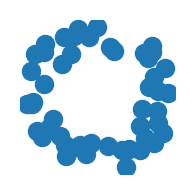

In [20]:
plt.figure(figsize=(1,1))
plt.scatter(*X.T)
plt.axis("off")

In [21]:
ph=ripser(X,do_cocycles=True)

In [22]:
lifetimes=ph["dgms"][1][:, 1] - ph["dgms"][1][:, 0]
isort=np.argsort(lifetimes)[::-1]
ix_largest=isort[0]
cocycle_edges=ph["cocycles"][1][ix_largest][:, :-1]# select edges only

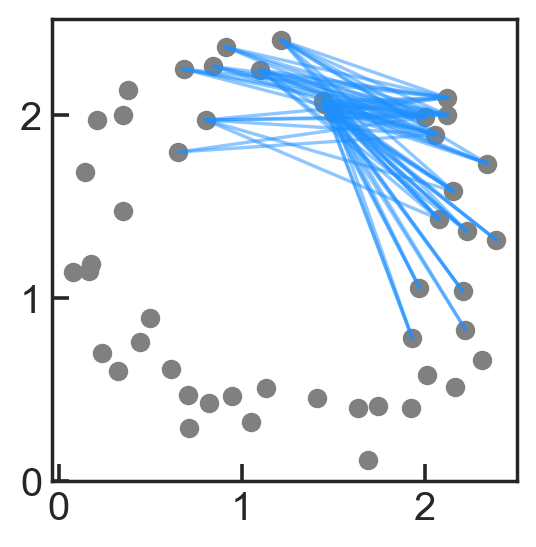

In [23]:
cocycle_edges

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot()

ax.scatter(*X.T, color = "grey")

for e in cocycle_edges:
    u,v = e
    ax.plot(
        *np.concatenate([X[[u]], X[[v]]], axis = 0).T, color= "dodgerblue", alpha = .5, 
        lw = 1.2
    )
    
# plt.axis("off")
# fig.savefig(
#     join(fig_dir, "cocycle_on_noisy_circle.png"), 
#     dpi = 320, 
#     bbox_inches="tight"
# )

In [24]:
from totopos import cells as tpc

In [25]:
birth_edge = cocycle_edges[0]
u,v=birth_edge

In [26]:
birth_distance = np.linalg.norm(
    X[u]-X[v]
)

In [27]:
G = tpc.vietoris_rips_graph(X,birth_distance)

In [29]:
tree_edges, loop_edges = tpc.prim_tree_find_loop(G,critical_edge=birth_edge, points=X)

In [30]:
tree_edges = np.array(
    [
        [e[0], e[1]] for e in tree_edges
    ]
)

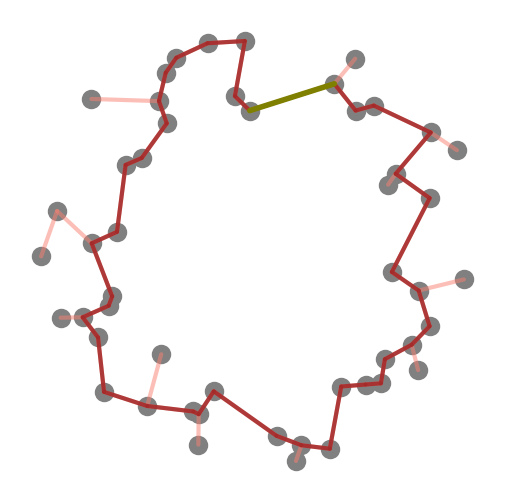

In [43]:
cocycle_edges

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot()

ax.scatter(*X.T, color = "grey")

for e in tree_edges:
    u,v = e
    ax.plot(
        *np.concatenate([X[[u]], X[[v]]], axis = 0).T, color= "salmon", alpha = .5, 
        lw = 1.5
    )

for e in loop_edges:
    u,v = e
    ax.plot(
        *np.concatenate([X[[u]], X[[v]]], axis = 0).T, color= "brown", alpha = .9, lw = 1.5
    )


uu,vv=birth_edge

plt.plot(
    *np.concatenate([X[[uu]], X[[vv]]]).T, color = "olive", lw=2
)

plt.axis("off")
fig.savefig(
    join(fig_dir, "mst_method.png"),
    dpi = 320, 
    bbox_inches="tight"
)

In [32]:
viz.set_plotting_style_plt()

In [46]:
fig_dir

'/home/mnu/projects/topo/figs/paper_figs/box2/'

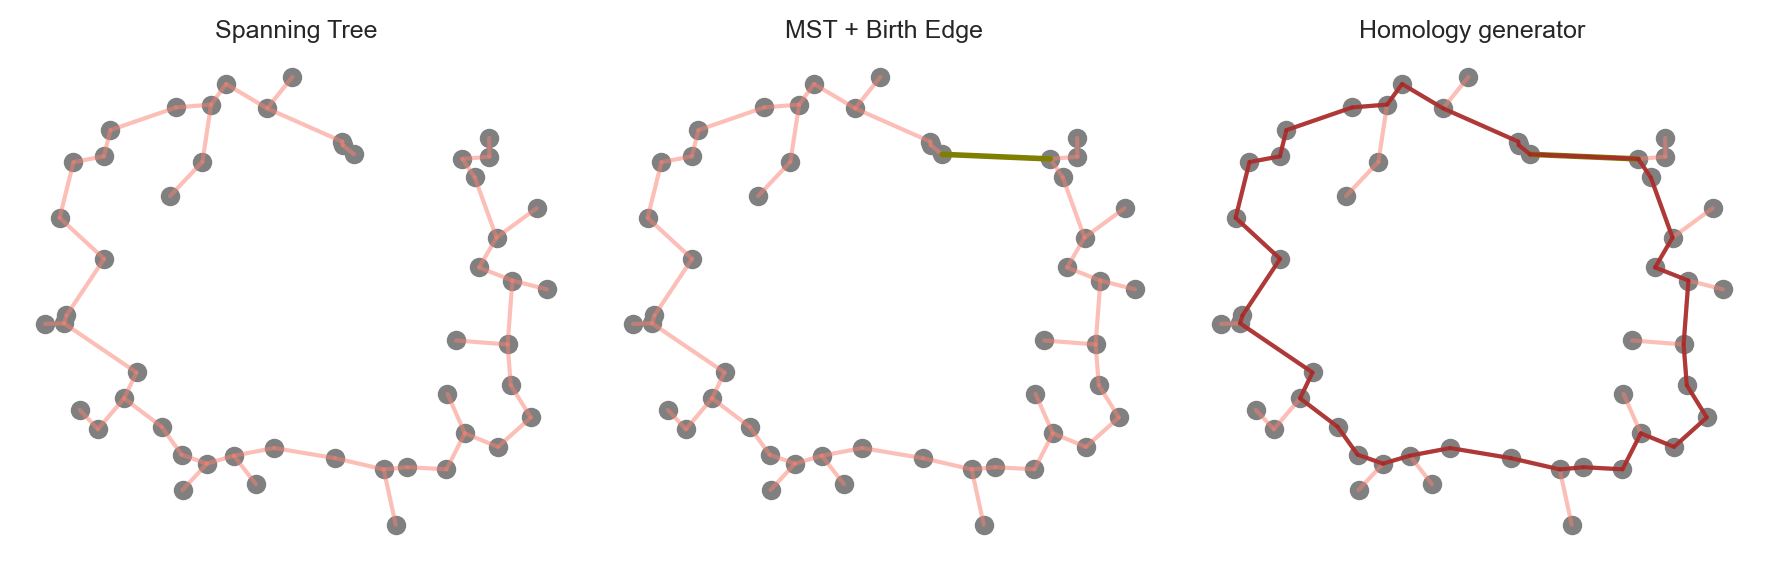

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join

fig, axes = plt.subplots(1, 3, figsize=(9, 3))  # 1 row, 3 columns

# --- Left plot: Only the spanning tree ---
axes[0].scatter(*X.T, color="grey")

for u, v in tree_edges:
    axes[0].plot(*np.concatenate([X[[u]], X[[v]]], axis=0).T, color="salmon", alpha=0.5, lw=1.5)

axes[0].axis("off")
axes[0].set_title("Spanning Tree", fontsize=9)

# --- Middle plot: Tree + Birth Edge ---
axes[1].scatter(*X.T, color="grey")

for u, v in tree_edges:
    axes[1].plot(*np.concatenate([X[[u]], X[[v]]], axis=0).T, color="salmon", alpha=0.5, lw=1.5)

uu, vv = birth_edge
axes[1].plot(*np.concatenate([X[[uu]], X[[vv]]]).T, color="olive", lw=2)

axes[1].axis("off")
axes[1].set_title("MST + Birth Edge", fontsize=9)

# --- Right plot: Tree + Birth Edge + Loop Edges ---
axes[2].scatter(*X.T, color="grey")

for u, v in tree_edges:
    axes[2].plot(*np.concatenate([X[[u]], X[[v]]], axis=0).T, color="salmon", alpha=0.5, lw=1.5)

axes[2].plot(*np.concatenate([X[[uu]], X[[vv]]]).T, color="olive", lw=2)

for u, v in loop_edges:
    axes[2].plot(*np.concatenate([X[[u]], X[[v]]], axis=0).T, color="brown", alpha=0.9, lw=1.5)

axes[2].axis("off")
axes[2].set_title("Homology generator", fontsize=9)

plt.tight_layout()
fig.savefig(
    join(fig_dir, "mst_method_grid.png"),
    dpi=420,
    bbox_inches="tight"
)


In [47]:
import torch

In [49]:
from totopos import genes as tpg

In [50]:
import anndata as ad

In [51]:
a = ad.AnnData(X)

In [ ]:
scores=tpg.topological_scores_perturbation_torch_ripser(a,ph,n_pcs=2,)

In [53]:
from totopos.utils.ph_utils import get_lifetimes

In [55]:
from totopos.utils.utils import randomized_pca_torch

In [57]:
n_pcs=2

In [58]:
pts = torch.Tensor(X)
pts.requires_grad_(True);
pcs = randomized_pca_torch(pts, n_pcs)
pcs_np = pcs.detach().numpy()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [59]:
cocycles=ph["cocycles"]
dgms=ph["dgms"]
lifetimes = get_lifetimes(dgms[1])
ix_largest = np.argsort(lifetimes)[-1]
cocycle_edges_largest_hom_class = cocycles[1][ix_largest][:, :2] # first two entries are edges 
cocycle_edges_largest_hom_class = cocycle_edges_largest_hom_class[:, ::-1] # get edges in lexicographic order 
death_time = dgms[1][ix_largest][1]

crit_edges_idx_x, crit_edges_idx_y = cocycle_edges_largest_hom_class.T

filt_values = torch.sum((pcs[crit_edges_idx_x, :] - pcs[crit_edges_idx_y, :])**2, axis=1) # distance of largest edges in critical simplices
target_crit_values = torch.repeat_interleave(torch.Tensor([death_time]), repeats=len(cocycle_edges_largest_hom_class))
topo_loss = torch.norm(target_crit_values - filt_values)
topo_loss.backward()

gradient = pts.grad
scores = gradient.norm(dim=0).numpy()

In [61]:
gradients_np = gradient.numpy()

In [69]:
Xt=X-gradients_np

In [72]:
Xt.shape

(50, 2)

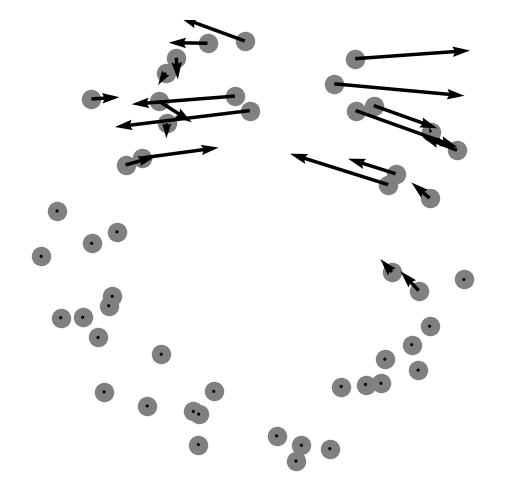

In [77]:
cocycle_edges

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot()

ax.scatter(*X.T, color = "grey")


# Plot the vectors
plt.quiver(
    X[:, 0], X[:, 1], -gradients_np[:, 0], -gradients_np[:, 1],
    angles='xy', scale_units='xy', scale=2, color='k')
    
plt.axis("off")


fig.savefig(
    join(fig_dir, "topograds.png"), 
    dpi = 320, 
    bbox_inches="tight"
)